In [22]:
import pickle
from scipy.stats import levene, shapiro, mannwhitneyu
import seaborn as sns
import pandas as pd

#### Read in data

In [3]:
def load_ARTS_data(dims, human=False):
    print('____________')
    print('ARTS ' + str(dims) + ' ' + str(human))

    y = []

    if dims == 94:
        if human:
            path_y = f"/workspace/data/Gold_Scores.pkl"     
        else:
            path_y = f"/workspace/data/gpt-4-1106-preview-94_scores.pkl"        
        path_sc = f'/workspace/data/ARTS_94_DF.pkl'
        
    if dims == 300:
        path_y = f"/workspace/data/gpt-4-1106-preview-300_scores.pkl"        
        path_sc = f'/workspace/data/ARTS_300_DF.pkl'

    if dims == 3000:
        path_y = f"/workspace/data/gpt-4-1106-preview-3000_scores.pkl"  
        path_sc = f'/workspace/data/ARTS_3000_DF.pkl'


    sc_labels = pickle.load(open(path_sc, "rb"))
    y_labels = pickle.load(open(path_y, "rb"))

    for i in range(len(sc_labels)):
        y.append(y_labels[i][0])

    return sc_labels, y

#### Statistics

In [4]:
def calc_simp_src(arts_labels, arts_scores):
    simp = []
    src = []
    for index, row in arts_labels.iterrows():
        if row['Label'] == 'src':
            src.append(arts_scores[index])
        else:
            simp.append(arts_scores[index])
    return simp, src

In [5]:
def calc_statistics(simp, src):
    print('avg simp: ' + str(sum(simp)/len(simp)))
    print('avg src: ' + str(sum(src)/len(src)))

    # homogenous variances
    if levene(simp, src).pvalue > 0.05:
        print('homogenous variances')
    else:
        print('ttest not allowed - variances not homogeneous')

    # normal distribution
    if shapiro(simp).pvalue > 0.05 and shapiro(src).pvalue > 0.05:
        print('normal distribution')
    else:
        print('ttest not allowed - not normally distributed')
        print('pvalue: ' + str(mannwhitneyu(simp, src).pvalue))

In [20]:
boxplot_data = []

for dims in [94, 300, 3000]:
    hl = False
    if dims == 94:
        for hl in [True, False]:
            arts_labels, arts_scores = load_ARTS_data(dims, hl)
            simp, src = calc_simp_src(arts_labels, arts_scores)
            calc_statistics(simp, src)
            boxplot_data.append((simp, src))
    else:
        arts_labels, arts_scores = load_ARTS_data(dims, hl)
        simp, src = calc_simp_src(arts_labels, arts_scores)
        calc_statistics(simp, src)
        boxplot_data.append((simp, src))

____________
ARTS 94 True
avg simp: 0.4698456521739133
avg src: 0.5288979166666665
homogenous variances
ttest not allowed - not normally distributed
pvalue: 0.33108823981244495
____________
ARTS 94 False
avg simp: 0.45324934782608695
avg src: 0.5448027083333334
homogenous variances
ttest not allowed - not normally distributed
pvalue: 0.1313139259881126
____________
ARTS 300 False
avg simp: 0.46033930817610064
avg src: 0.5447237588652483
homogenous variances
ttest not allowed - not normally distributed
pvalue: 0.011947757086461392
____________
ARTS 3000 False
avg simp: 0.47594151999999995
avg src: 0.52405848
ttest not allowed - variances not homogeneous
ttest not allowed - not normally distributed
pvalue: 5.055542485607517e-06


#### Boxplots

In [84]:
bp = []
lab = []
ds = []

name= {0: 'ARTS_94-Human', 1: 'ARTS_94-GPT', 2: 'ARTS_300-GPT', 3: 'ARTS_3000-GPT'}

for i in range(len(boxplot_data)):

    s = boxplot_data[i][0]
    for e in s:
        bp.append(e)
        lab.append('simplified text')
        ds.append(name[i])

    c = boxplot_data[i][1]
    for e in c:
        bp.append(e)
        lab.append('source text')
        ds.append(name[i])

In [86]:
full_bp = pd.DataFrame({'ARTS score':bp, 'Classes':lab, 'Dataset':ds})

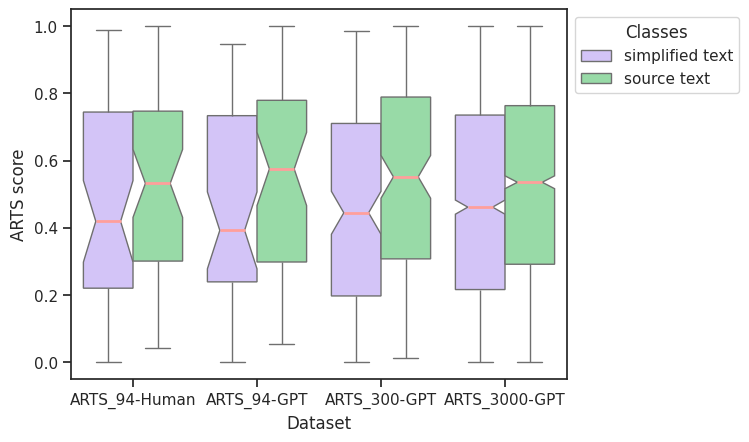

In [95]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data = full_bp, notch=True,  showcaps=True, y='ARTS score', x='Dataset', hue='Classes',  palette=["m", "g"],
    flierprops={"marker": "x"},
    medianprops={"color": "r", "linewidth": 2})
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))